In [1]:
import numpy as np
import pandas as pd
import shap
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, cross_validate, GroupKFold, StratifiedGroupKFold, RepeatedKFold, StratifiedKFold, GridSearchCV, KFold
from sklearn import metrics, linear_model
from xgboost import XGBClassifier, XGBRegressor
import os
import sys
import matplotlib.pyplot as plt
import pickle
import statsmodels.formula.api as smf
from datetime import datetime

cities_all=['Berlin','Dresden','Düsseldorf','Frankfurt am Main','Kassel','Leipzig','Magdeburg','Potsdam','Clermont','Dijon','Lille','Lyon','Montpellier','Nantes','Nimes','Paris','Toulouse','Madrid','Wien','France_other','Germany_other']
countries=['Germany','Germany','Germany','Germany','Germany','Germany','Germany','Germany','France','France','France','France','France','France','France','France','France','Spain','Austria','France','Germany']

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [2]:
city0='Berlin'
df0=pd.read_csv('../outputs/Combined/' + city0 + '_UF.csv')
df0['Commute_Trip']=0
df0.loc[df0['Trip_Purpose_Agg']=='Home↔Work','Commute_Trip']=1
#print(len(df0.columns), 'columns in the data for ', city0)
df0=df0.loc[:,['Res_geocode', 'DistSubcenter_res', 'DistCenter_res',
#'PopDensity_res','BuildDensity_res', 
'UrbPopDensity_res', 'UrbBuildDensity_res',
'IntersecDensity_res', 'street_length_res', 'LU_UrbFab_res',#'bike_lane_share_res',
'LU_Comm_res',  'Commute_Trip','Age','Trip_Distance']] # 'LU_Road_res', 'LU_Urban_res',
df0['City']=city0
df0['Country']='Germany'
df_all=df0.copy()

cities0=['Dresden','Leipzig','Magdeburg','Potsdam','Frankfurt am Main','Düsseldorf','Kassel']
for city1 in cities0:
        print(city1)
        df1=pd.read_csv('../outputs/Combined/' + city1 + '_UF.csv')
        df1['Commute_Trip']=0
        df1.loc[df1['Trip_Purpose_Agg']=='Home↔Work','Commute_Trip']=1
        df1=df1.loc[:,['Res_geocode', 'DistSubcenter_res', 'DistCenter_res',
        #'PopDensity_res','BuildDensity_res', 
        'UrbPopDensity_res', 'UrbBuildDensity_res',
        'IntersecDensity_res', 'street_length_res', 'LU_UrbFab_res',#'bike_lane_share_res',
        'LU_Comm_res', 'Commute_Trip','Age','Trip_Distance']]
        #print(len(df1.columns), 'columns in the data for ', city1)
        df1['City']=city1
        df1['Country']='Germany'
        if len(df1.columns==df_all.columns):
                df_all=pd.concat([df_all,df1])
                print(city1, 'added.')
                print(len(df_all), 'rows in the combined dataframe')
df_DE=df_all.copy()

Dresden
Dresden added.
123348 rows in the combined dataframe
Leipzig
Leipzig added.
134404 rows in the combined dataframe
Magdeburg
Magdeburg added.
143447 rows in the combined dataframe
Potsdam
Potsdam added.
148770 rows in the combined dataframe
Frankfurt am Main
Frankfurt am Main added.
154306 rows in the combined dataframe
Düsseldorf
Düsseldorf added.
176483 rows in the combined dataframe
Kassel
Kassel added.
185111 rows in the combined dataframe


Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.


In [3]:
# FR, other
city0='Clermont'
df0=pd.read_csv('../outputs/Combined/' + city0 + '_UF.csv')
df0['Commute_Trip']=0
df0.loc[df0['Trip_Purpose_Agg']=='Home↔Work','Commute_Trip']=1
df0=df0.loc[:,['Res_geocode', 'DistSubcenter_res', 'DistCenter_res',
#'PopDensity_res','BuildDensity_res', 
'UrbPopDensity_res', 'UrbBuildDensity_res',
'IntersecDensity_res', 'street_length_res', 'LU_UrbFab_res',#'bike_lane_share_res',
'LU_Comm_res', 'Commute_Trip','Age','Trip_Distance']]
#print(len(df0.columns), 'columns in the data for ', city0)
df0['City']=city0
df0['Country']='France'
df_all=df0.copy()

cities0=['Toulouse','Montpellier','Lyon','Nantes','Nimes','Lille','Dijon','Paris']
for city1 in cities0:
        print(city1)
        df1=pd.read_csv('../outputs/Combined/' + city1 + '_UF.csv')
        df1['Commute_Trip']=0
        df1.loc[df1['Trip_Purpose_Agg']=='Home↔Work','Commute_Trip']=1
        df1=df1.loc[:,['Res_geocode', 'DistSubcenter_res', 'DistCenter_res',
        #'PopDensity_res','BuildDensity_res', 
        'UrbPopDensity_res', 'UrbBuildDensity_res',
        'IntersecDensity_res', 'street_length_res', 'LU_UrbFab_res',#'bike_lane_share_res',
        'LU_Comm_res', 'Commute_Trip','Age','Trip_Distance']]
#print(len(df0.columns), 'columns in the data for ', city0)
        print(len(df1.columns), 'columns in the data for ', city1)
        df1['City']=city1
        df1['Country']='France'
        if len(df1.columns==df_all.columns):
                df_all=pd.concat([df_all,df1])
                print(city1, 'added.')
                print(len(df_all), 'rows in the combined dataframe')
df_FR=df_all.copy()

Toulouse
12 columns in the data for  Toulouse
Toulouse added.
40299 rows in the combined dataframe
Montpellier
12 columns in the data for  Montpellier
Montpellier added.
63973 rows in the combined dataframe
Lyon
12 columns in the data for  Lyon
Lyon added.
114184 rows in the combined dataframe
Nantes
12 columns in the data for  Nantes
Nantes added.
147302 rows in the combined dataframe
Nimes
12 columns in the data for  Nimes
Nimes added.
155222 rows in the combined dataframe
Lille
12 columns in the data for  Lille
Lille added.
186149 rows in the combined dataframe
Dijon
12 columns in the data for  Dijon
Dijon added.
199280 rows in the combined dataframe
Paris
12 columns in the data for  Paris
Paris added.
258980 rows in the combined dataframe


In [4]:
df=pd.read_csv('../outputs/Combined/' + 'Madrid' + '_UF.csv',dtype={'Ori_geocode': str, 'Des_geocode': str,'Res_geocode': str })
df['Commute_Trip']=0
df.loc[df['Trip_Purpose_Agg']=='Home↔Work','Commute_Trip']=1
df_UF=df.loc[:,['Res_geocode', 'DistSubcenter_res', 'DistCenter_res',
                #'PopDensity_res','BuildDensity_res',
                'UrbPopDensity_res', 'UrbBuildDensity_res',
                'IntersecDensity_res', 'street_length_res', 'LU_UrbFab_res',#'bike_lane_share_res',
                'LU_Comm_res', 'Commute_Trip','Age','Trip_Distance']]
df_UF['City']='Madrid'
df_UF['Country']='Spain'
df_Madrid=df_UF.copy()

In [5]:
df=pd.read_csv('../outputs/Combined/' + 'Wien' + '_UF.csv',dtype={'Ori_geocode': str, 'Des_geocode': str,'Res_geocode': str })
df['Commute_Trip']=0
df.loc[df['Trip_Purpose_Agg']=='Home↔Work','Commute_Trip']=1
df_UF=df.loc[:,['Res_geocode', 'DistSubcenter_res', 'DistCenter_res',
                #'PopDensity_res','BuildDensity_res',
                'UrbPopDensity_res', 'UrbBuildDensity_res',
                'IntersecDensity_res', 'street_length_res', 'LU_UrbFab_res',#'bike_lane_share_res',
                'LU_Comm_res', 'Commute_Trip','Age','Trip_Distance']]
df_UF['City']='Wien'
df_UF['Country']='Austria'
df_Wien=df_UF.copy()

In [6]:
del df_UF
df_UF=pd.concat([df_DE,df_FR,df_Madrid,df_Wien],ignore_index=True)
df_UF['Res_geocode']= df_UF['City'] + '_' + df_UF['Res_geocode'].astype(str)
df_UF.drop(columns='City',inplace=True)
df_UF.head()

,Res_geocode,DistSubcenter_res,DistCenter_res,UrbPopDensity_res,UrbBuildDensity_res,IntersecDensity_res,street_length_res,LU_UrbFab_res,LU_Comm_res,Commute_Trip,Age,Trip_Distance,Country
0,Berlin_10115,2.761334,1.972959,8794.155101,9.010181e+06,39.380867,127.710059,0.395459,0.366144,1,29,729.0,Germany
1,Berlin_10115,2.761334,1.972959,8794.155101,9.010181e+06,39.380867,127.710059,0.395459,0.366144,1,29,729.0,Germany
2,Berlin_10115,2.761334,1.972959,8794.155101,9.010181e+06,39.380867,127.710059,0.395459,0.366144,1,46,6259.0,Germany
3,Berlin_10115,2.761334,1.972959,8794.155101,9.010181e+06,39.380867,127.710059,0.395459,0.366144,1,46,1474.0,Germany
4,Berlin_10115,2.761334,1.972959,8794.155101,9.010181e+06,39.380867,127.710059,0.395459,0.366144,0,12,1159.0,Germany


In [7]:
df_UF['Country'].value_counts()

France     258980
Germany    185111
Spain      165782
Austria     18542
Name: Country, dtype: int64

In [8]:
count=df_UF.groupby('Res_geocode')['Trip_Distance'].count().reset_index()
count.rename(columns={'Trip_Distance':'count'},inplace=True)
Res_geocode_country=df_UF.loc[:,['Res_geocode','Country']].drop_duplicates()
df_UF=df_UF.groupby('Res_geocode').mean().drop_duplicates() #
df_UF.reset_index(inplace=True)
df_UF=df_UF.merge(Res_geocode_country)

df_UF=df_UF.merge(count)
df_UF=df_UF.loc[df_UF['count']>4,]
df_agg=df_UF.copy()
N=len(df_UF)
df0=df_UF.copy()

#df_agg.sort_values(by='Res_geocode',inplace=True)
df_agg.dropna(subset=['Trip_Distance'],inplace=True)
df_agg.loc[:,['Country_Germany','Country_France','Country_Spain','Country_Austria']]=0
df_agg.loc[df_agg['Country']=='Germany','Country_Germany']=1
df_agg.loc[df_agg['Country']=='France','Country_France']=1
df_agg.loc[df_agg['Country']=='Spain','Country_Spain']=1
df_agg.loc[df_agg['Country']=='Austria','Country_Austria']=1

target='Trip_Distance'

X=df_agg.drop(columns=['Res_geocode','count','Country',target])
y=df_agg['Trip_Distance']

In [9]:
n_parameter_all = 150
lr_parameter_all = 0.05
md_parameter_all = 3

In [10]:
y_predict = pd.DataFrame()
y_predict2 = pd.DataFrame()
y_test = pd.DataFrame()
y_test2 = pd.DataFrame()
summ_table_list=[]

shap_values= pd.DataFrame() 

model = XGBRegressor(
max_depth=md_parameter_all, 
n_estimators=n_parameter_all, 
learning_rate=lr_parameter_all)

# if doing the repeated cv and creation of shap values
r2ml=[]
r2lr=[]

In [11]:
cv = RepeatedKFold(n_splits=5,n_repeats=10,random_state=2)
city='All'

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is depreca

GBDT Model r2: All
0.5856193870297192
LR Model r2: All
0.5593318317231215
0
1
2
3
4
5


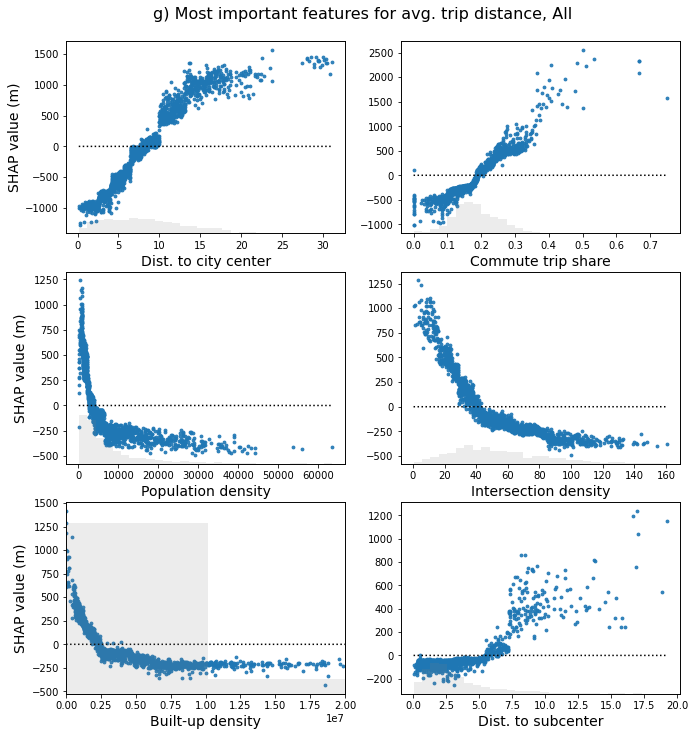

In [12]:
form_str="Trip_Distance ~ DistSubcenter_res + DistCenter_res + UrbPopDensity_res + UrbBuildDensity_res  + IntersecDensity_res + street_length_res + LU_Comm_res + LU_UrbFab_res + Commute_Trip + Age + Country" # bike_lane_share_res  + 
writer = pd.ExcelWriter('../outputs/ML_Results/dist_LR/'  + city + '.xlsx', engine='openpyxl')
for train_idx, test_idx in cv.split(X): # select here 
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
        df_train, df_test = df0.iloc[train_idx], df0.iloc[test_idx]
        y_test_fold2=df_test['Trip_Distance']
        id=datetime.now().strftime("%S%f")
        #print('id',id)

        # train & predict
        model.fit(X_train, y_train, verbose=False, eval_set=[(X_train, y_train), (X_test, y_test_fold)])
        y_predict_fold = pd.Series(model.predict(X_test), index=X_test.index)
        r2ml.extend([metrics.r2_score(y_test_fold.array, y_predict_fold.array)])
        # explain
        explainer = shap.TreeExplainer(model)
        
        shap_values_fold = explainer.shap_values(X_test,check_additivity=False)
        
        shap_values_fold = pd.DataFrame(shap_values_fold, index=X_test.index, columns=X.columns) 

        y_predict = pd.concat([y_predict, y_predict_fold], axis=0)
        y_test = pd.concat([y_test, y_test_fold], axis=0)

        shap_values = pd.concat([shap_values, shap_values_fold], axis=0)
        
        lin_reg = smf.ols(form_str, data=df_train).fit()
        yhat=np.asarray(lin_reg.predict(df_test.drop(columns='Trip_Distance')))
        y_predict_fold2 = pd.Series(yhat, index=df_test.index)
        y_predict2 = pd.concat([y_predict2, y_predict_fold2], axis=0)
        y_test2 = pd.concat([y_test2, y_test_fold2], axis=0)
        
        r2lr.extend([metrics.r2_score(y_test_fold.array, y_predict_fold2.array)])

        coeff=lin_reg.params.reset_index()
        coeff.rename(columns={'index':'param',0:'coefficient'},inplace=True)

        pval=lin_reg.pvalues.reset_index()
        pval.rename(columns={'index':'param',0:'p'},inplace=True)

        summ_table=pd.concat([coeff,pval['p']],axis=1)
        summ_table['param']=summ_table['param'].str.replace('FeatureO_','')

        st_list_fold=[summ_table.drop(columns='param').to_numpy()]
        summ_table_list.append(st_list_fold)

        summ_table.to_excel(writer, sheet_name='summ' + id,index=False)
# Close the Pandas Excel writer and output the Excel file.
writer.save()
writer.close()

mdarray=np.array(summ_table_list).squeeze()
means=np.nanmean(mdarray,axis=0)
means_df=pd.DataFrame(data=np.hstack((np.reshape(summ_table['param'].to_numpy(),(len(summ_table),1)),means)),columns=summ_table.columns.values)
means_df.to_csv('../outputs/ML_Results/dist_LR/'  + city + '_mean.csv',index=False)

y_test = y_test.squeeze(axis=1)
y_test2 = y_test2.squeeze(axis=1)
y_predict = y_predict.squeeze(axis=1)
y_predict2 = y_predict2.squeeze(axis=1)
r2_model=metrics.r2_score(y_test, y_predict)
r2_model_reg=metrics.r2_score(y_test2, y_predict2)
print('GBDT Model r2: ' + city)
print(r2_model)
print('LR Model r2: ' + city)
print(r2_model_reg)

r8=['rkf_gridSearch','agg_postcode','5splits_10repeats',lr_parameter_all,md_parameter_all,n_parameter_all,N] #
HPO_summary=pd.DataFrame([r8],columns=['CV_Type','Sample','CV_params','LR','MD','N_est','N_obs']) # the last element in this case is the sd of f1 scores in the fold which produced best results
HPO_summary['R2_full_ML']=r2_model
HPO_summary['R2_full_LR']=r2_model_reg
HPO_summary['City']=city
HPO_summary.to_csv('../outputs/ML_Results/' + city + '_HPO_dist_agg_summary.csv',index=False)

r2ml=pd.DataFrame(r2ml)
r2ml.columns=['GBDT']
r2ml['LR']=r2lr
r2ml.to_csv('../outputs/ML_Results/' + city + '_HPO_dist_agg_r2.csv',index=False)

X_disp=[re.sub('featureD_','', x) for x in X.columns]

shap_values=shap_values.sort_index()
shap_values.reset_index(inplace=True)
shap_values=shap_values.groupby('index').mean().reset_index()
shap_values.drop(columns=['index'],inplace=True)

shap.summary_plot(shap_values.sort_index().to_numpy(), X.sort_index(),feature_names=X_disp,max_display=14,show=False)
plt.title('Feature Influence for Trip Distance, ' + city + ', R2: ' + round(r2_model,3).astype(str))
plt.xlabel("SHAP value (impact on distance, in m)")
plt.savefig('../outputs/ML_Results/result_figures/dist_agg/' + city + '_FI_distance.png',facecolor='w',dpi=65,bbox_inches='tight')
plt.close()
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_disp, shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)

#n=importance_df[:10].index
n=importance_df.loc[importance_df['column_name'].isin(['DistCenter_res','DistSubcenter_res','UrbBuildDensity_res','IntersecDensity_res','UrbPopDensity_res','street_length_res','LU_Comm_res','LU_UrbFab_res','Age','Commute_Trip'])].index


X.sort_index(inplace=True)
data=X.sort_index().iloc[:,n]
values=shap_values.sort_index().iloc[:,n]

xl=[]
yl=[]
y0=[]

for i in range(len(n)):
        dftemp=pd.DataFrame({'d':data.iloc[:,i],'v':values.iloc[:,i]})
        dftemp=dftemp.groupby('d')['v'].mean().reset_index()
        dftemp['v0']=0
        xl.append(dftemp['d'].values)
        yl.append(dftemp['v'].values)
        y0.append(dftemp['v0'].values)

# fig = plt.figure(figsize=(12,15))

# for i in range(0,8):
#         ax1 = fig.add_subplot(421+i)
#         xs=data.iloc[:,i]
#         ys=values.iloc[:,i]
#         x=xl[i]
#         y1=y0[i]
#         y2=yl[i]
#         xlab=data.columns[i]

#         ax1.scatter(xs+np.random.normal(0, 0.05, len(data)),ys,alpha=0.9,s=8)
#         plt.plot(x,y1,'k:',label='zero')
#         #plt.plot(x,y2,'k',label='mean')
#         plt.legend(loc="upper left",prop={'size':12})
#         if i%2==0:
#                 ax1.set_ylabel('SHAP value (m)',size=13)
#         else:
#                 ax1.set_ylabel('')
#         ax1.set_xlabel(xlab,size=13)

#         ax2 = ax1.twinx() 
#         if len(xs.unique())==2:
#                 ax2.hist(xs,bins=[-0.5,0.5,1.5], align='mid',color='gray',alpha=0.25)
#                 ax2.set_xticks([-.5,0,0.5,1,1.5])
#         else:
#                 ax2.hist(xs,bins=30,color='gray',alpha=0.15)
#                 ax2.set_ylim(0,len(data))
#         ax2.set_yticks([])
# plt.suptitle("SHAP values for most important UF features, " + city,y=0.92,size=16)
# plt.savefig('../outputs/ML_Results/result_figures/dist_agg/' + city + '_main.png',facecolor='w',dpi=65,bbox_inches='tight')
# plt.close()

data.rename(columns={'DistCenter_res':'Dist. to city center','UrbBuildDensity_res':'Built-up density','IntersecDensity_res':'Intersection density',
                     'LU_Comm_res':'Commercial area','LU_UrbFab_res':'Urban Fabric area','LU_Road_res':'Road area','street_length_res':'Avg. street length',
                     'UrbPopDensity_res':'Population density','DistSubcenter_res':'Dist. to subcenter','transit_accessibility':'Transit accessibility',
                     'Commute_Trip':'Commute trip share','bike_lane_share_res':'Cycle lane share'},inplace=True)
if city == 'All': let='g'

fig = plt.figure(figsize=(11,12))
for i in range(0,6):
        print(i)
        ax1 = fig.add_subplot(321+i)
        xs=data.iloc[:,i]
        ys=values.iloc[:,i]
        x=xl[i]
        y1=y0[i]
        y2=yl[i]
        xlab=data.columns[i]

        ax1.scatter(xs,ys,alpha=0.9,s=8)
        plt.plot(x,y1,'k:',label='zero')
        if (xlab== 'Built-up density'):
                plt.xlim([0, 2e7])
        if i%2==0:
                ax1.set_ylabel('SHAP value (m)',size=14)
        else:
                ax1.set_ylabel('')
        ax1.set_xlabel(xlab,size=14)

        ax2 = ax1.twinx() 
        if len(xs.unique())==2:
                ax2.hist(xs,bins=[-0.5,0.5,1.5], align='mid',color='gray',alpha=0.25)
                ax2.set_xticks([-.5,0,0.5,1,1.5])
        else:
                ax2.hist(xs,bins=30,color='gray',alpha=0.15)
                ax2.set_ylim(0,len(data))
        ax2.set_yticks([])
plt.suptitle(let + ') ' +  "Most important features for avg. trip distance, " + city.replace('_',', '),y=0.92,size=16)
plt.savefig('../outputs/ML_Results/result_figures/dist_agg/' + city + '_main6.png',facecolor='w',dpi=65,bbox_inches='tight')

# save shap_values, to enable later re-creation and editing of shap plots
with open('../outputs/ML_Results/shap/dist_agg/' + city + '.pkl', 'wb') as f:
        pickle.dump(shap_values, f)

with open('../outputs/ML_Results/shap/dist_agg/' + city + '_importance.pkl', 'wb') as g:
        pickle.dump(importance_df, g)

with open('../outputs/ML_Results/shap/dist_agg/' + city + '_df.pkl', 'wb') as h:
        pickle.dump(df_agg, h)